In [53]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import platform
import warnings

In [87]:
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

warnings.filterwarnings('ignore')

### 외식지수 데이터 정제하기

In [55]:
eat_out=pd.read_csv('./Data/외식지수.csv',encoding='euc-kr',header=1)
eat_out.head()

,시점,외식
0,1985.01,21.026
1,1985.02,21.079
2,1985.03,21.132
3,1985.04,21.184
4,1985.05,21.184


In [56]:
eat_out['시점'] = eat_out['시점'].astype(np.str0).str.replace('.','/')
eat_out['시점'] = pd.to_datetime(eat_out['시점'],format='%Y/%m')
eat_out.columns=['날짜','외식']

In [57]:
eat_out = pd.pivot_table(eat_out,index=['날짜'],aggfunc=np.mean)

In [58]:
target = pd.read_csv('./Data/rice_target.csv')
target['날짜']=pd.to_datetime(target['날짜'],format='%Y-%m-%d')
target.sort_values(by='날짜').reset_index(drop=True)

,날짜,년도,소비량,월
0,1997-11-01,1997,277.8,11
1,1997-12-01,1997,275.3,12
2,1998-01-01,1998,278.0,1
3,1998-02-01,1998,266.7,2
4,1998-03-01,1998,273.1,3
...,...,...,...,...
270,2022-05-01,2022,154.1,5
271,2022-06-01,2022,154.8,6
272,2022-07-01,2022,150.7,7
273,2022-08-01,2022,151.8,8


In [59]:
df=pd.merge(target,eat_out,on='날짜',how='inner')
df

,날짜,년도,소비량,월,외식
0,1997-11-01,1997,277.8,11,58.1630
1,1997-12-01,1997,275.3,12,58.8510
2,1998-01-01,1998,278.0,1,60.4085
3,1998-02-01,1998,266.7,2,61.1740
4,1998-03-01,1998,273.1,3,61.3860
...,...,...,...,...,...
270,2022-05-01,2022,154.1,5,109.8100
271,2022-06-01,2022,154.8,6,110.6700
272,2022-07-01,2022,150.7,7,111.3900
273,2022-08-01,2022,151.8,8,112.2000


### 외식지수 소비량 상관계수 찍기
- 0.96로 매우 높은 역상관관계를 가진다. 

In [91]:
df[['소비량','외식']].corr()

,소비량,외식
소비량,1.000000,-0.959967
외식,-0.959967,1.000000


### 외식지수 소비량 시각화 하기

<Figure size 2000x800 with 0 Axes>

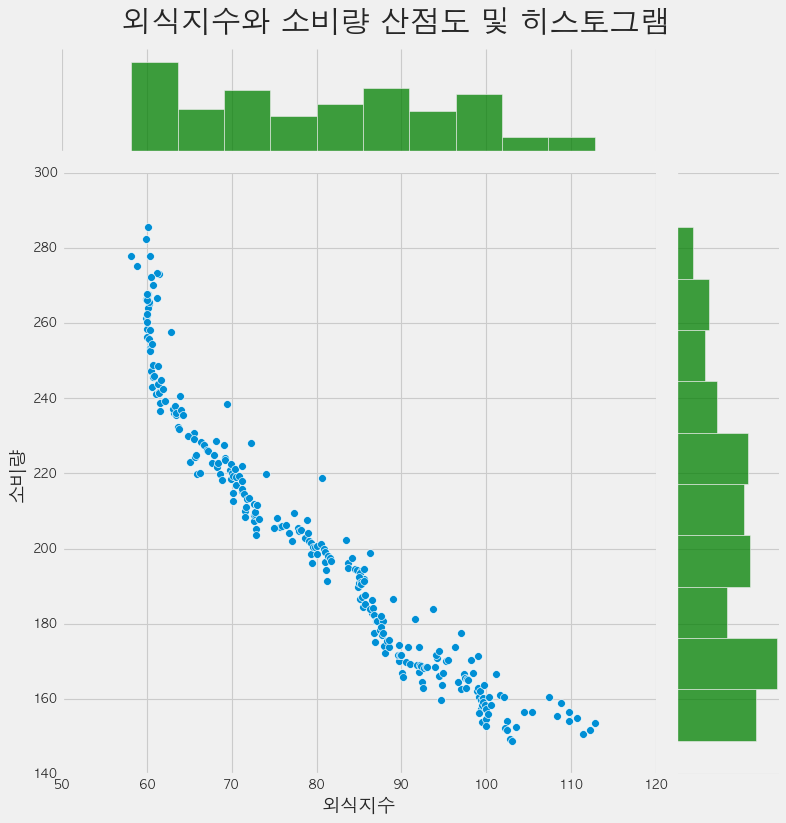

In [88]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(25,10))

j1 = sns.jointplot(
	x = '외식',
	y = '소비량',
	data = df,
    height=10,
    marginal_kws={'color': 'green'},
    s = 50
)

j1.fig.suptitle(
    '외식지수와 소비량 산점도 및 히스토그램', y=1.03, fontsize = 27
)

plt.savefig('./Plot/외식지수 와 소비량 산점도.jpg')
plt.xlabel('외식지수')

plt.show()

> ### 외식지수를 유도해 낼 수 있는 feature들을 만들어가면 예측력이 높은 모델을 만들 수 있을 것이라 예측 된다. 